In [1]:
from analysis.analyze_results import *
from pathlib import Path
import matplotlib

In [2]:
# output_base_folder = Path("/Users/che/iarai/work/logs/storage_benchmarking")
# output_base_folder = Path("/iarai/work/logs/storage_benchmarking")
output_base_folder = Path("/home/ivan/temp/temp-benchmarking")


## Dataloader benchmark

**parameters**

| param | range |
| --- | --- |
| batch_pool_size | 2, 4, 8, 16, 32, 64 | 
| num_fetch_workers | 2, 4, 8, 16, 32, 64, 128 | 
| fetch_impl | asyncio, threaded |
| dataset | s3,scratch |


**parameters explained**

| param | implementation | details | 
| --- | --- | --- |
| batch_pool_size | asyncio | Unused |
|  | threaded | Number of batches to fetch in parallel (normally, one batch is fetched, and items are downloaded (sequentiall or in parallel). This implementation takes N batches, and starts downloading items in parallel. Individual items are yielded and once a full batch is collected it is yielded.)|
| num_fetch_workers | asyncio | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls. Also, the number of tasks initiall placed into the task (worker) queue.  |
|  | threaded | ThreadPoolExecutor argument for the maximum number of threads that can be used to execute the given calls |

In [3]:
group_by_dataloader = ["dataset",  "num_fetch_workers", "num_workers", "batch_pool"]

In [4]:
df_dataloader = extract_pandas(output_base_folder, folder_filter="fetcher_impl_5/*benchmark_dataloader_scratch*")

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 126/126 [00:08<00:00, 15.52it/s]


In [5]:
df_dataloader_zeroworkers_aio=df_dataloader[df_dataloader["num_workers"]==0]
df_dataloader_zeroworkers_aio=df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["fetch_impl"]=="asyncio"]


In [6]:
print(df_dataloader_zeroworkers_aio.groupby(group_by_dataloader).groups.keys())

dict_keys([('scratch', 2, 0, 2), ('scratch', 2, 0, 4), ('scratch', 2, 0, 8), ('scratch', 2, 0, 16), ('scratch', 2, 0, 32), ('scratch', 2, 0, 64), ('scratch', 4, 0, 2), ('scratch', 4, 0, 4), ('scratch', 4, 0, 8), ('scratch', 4, 0, 16), ('scratch', 4, 0, 32), ('scratch', 4, 0, 64), ('scratch', 8, 0, 2), ('scratch', 8, 0, 4), ('scratch', 8, 0, 8), ('scratch', 8, 0, 16), ('scratch', 8, 0, 32), ('scratch', 8, 0, 64), ('scratch', 16, 0, 2), ('scratch', 16, 0, 4), ('scratch', 16, 0, 8), ('scratch', 16, 0, 16), ('scratch', 16, 0, 32), ('scratch', 16, 0, 64), ('scratch', 32, 0, 2), ('scratch', 32, 0, 4), ('scratch', 32, 0, 8), ('scratch', 32, 0, 16), ('scratch', 32, 0, 32), ('scratch', 32, 0, 64), ('scratch', 64, 0, 2), ('scratch', 64, 0, 4), ('scratch', 64, 0, 8), ('scratch', 64, 0, 16), ('scratch', 64, 0, 32), ('scratch', 64, 0, 64), ('scratch', 128, 0, 2), ('scratch', 128, 0, 4), ('scratch', 128, 0, 8), ('scratch', 128, 0, 16), ('scratch', 128, 0, 32), ('scratch', 128, 0, 64)])


In [7]:
display(get_run_stats(df_dataloader_zeroworkers_aio, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool run                                                                       
scratch 2                 0           2          20210927f131108_benchmark_dataloader_scratch_12...          351066865.0   
                                      4          20210927f131132_benchmark_dataloader_scratch_12...          341482673.0   
                                      8          20210927f131158_benchmark_dataloader_scratch_12...          332884489.0   
                                      16         20210927f131222_benchmark_dataloader_scratch_12...          347586181.0   
                                      32         20210927f131247_benchmark_dataloader_scratch_12...          357915348.0   
                                      64         20210927f131313_benchmark_dataloader_scratch_12...          342759060.0   
        4                 0           2          20210927f131334_benchmark_dataloader_scratch_12...          335209081.0   
                                      4          20210927f131352_benchmark_dataloader_scratch_12...          340813337.0   
                                      8          20210927f131410_benchmark_dataloader_scratch_12...          346602848.0   
                                      16         20210927f131430_benchmark_dataloader_scratch_12...          335729591.0   
                                      32         20210927f131449_benchmark_dataloader_scratch_12...          342423526.0   
                                      64         20210927f131508_benchmark_dataloader_scratch_12...          333664738.0   
        8                 0           2          20210927f131526_benchmark_dataloader_scratch_12...          349524424.0   
                                      4          20210927f131542_benchmark_dataloader_scratch_12...          343366210.0   
                                      8          20210927f131558_benchmark_dataloader_scratch_12...          333531508.0   
                                      16         20210927f131614_benchmark_dataloader_scratch_12...          341092727.0   
                                      32         20210927f131630_benchmark_dataloader_scratch_12...          350695451.0   
                                      64         20210927f131647_benchmark_dataloader_scratch_12...          338703462.0   
        16                0           2          20210927f131703_benchmark_dataloader_scratch_12...          339048432.0   
                                      4          20210927f131722_benchmark_dataloader_scratch_12...          337177882.0   
                                      8          20210927f131738_benchmark_dataloader_scratch_12...          336251659.0   
                                      16         20210927f131756_benchmark_dataloader_scratch_12...          337463417.0   
                                      32         20210927f131813_benchmark_dataloader_scratch_12...          336666813.0   
                                      64         20210927f131830_benchmark_dataloader_scratch_12...          351517887.0   
        32                0           2          20210927f131847_benchmark_dataloader_scratch_12...          357797630.0   
                                      4          20210927f131905_benchmark_dataloader_scratch_12...          339840790.0   
                                      8          20210927f131922_benchmark_dataloader_scratch_12...          352847415.0   
                                      16         20210927f131941_benchmark_dataloader_scratch_12...          339147477.0   
                                      32         20210927f131958_benchmark_dataloader_scratch_12...          337127255.0   
                                      64         20210927f132016_benchmark_dataloader_scratch_12...          337901066.0   
        64                0           2          20210927f132034_benchmark_dataloader_scratch_12...          350043427.0   
         

In [8]:
display(get_thread_stats(df_dataloader_zeroworkers_aio,group_by=group_by_dataloader))

,time_start_thread,time_end_thread,total_elapsed_thread,dataset,num_fetch_workers,num_workers,batch_pool,elapsed_thread,elapsed_processing
threading_ident,,,,,,,,,
139638497113856,1.632741e+09,1.632741e+09,3.889962,scratch,4,0,8,4.409917,0.882094
139638539060992,1.632741e+09,1.632741e+09,3.907213,scratch,4,0,8,4.410926,0.885803
139638581008128,1.632741e+09,1.632741e+09,3.993111,scratch,4,0,8,4.412223,0.905011
139638589400832,1.632741e+09,1.632741e+09,3.933053,scratch,4,0,8,4.413163,0.891210
139649905317632,1.632742e+09,1.632742e+09,1.139006,scratch,64,0,32,4.087666,0.278644
...,...,...,...,...,...,...,...,...,...
140707867723520,1.632741e+09,1.632741e+09,2.514386,scratch,16,0,32,3.651566,0.688577
140707876116224,1.632741e+09,1.632741e+09,2.532304,scratch,16,0,32,3.652083,0.693386
140707985172224,1.632741e+09,1.632741e+09,2.528902,scratch,16,0,32,3.652589,0.692359


### Event plots of dataloading

Let's visualize the timeline of dataloading, a new color for each thread (cycle 8)

In [9]:
df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==2) & (df_dataloader_zeroworkers_aio["batch_pool"]==4)]["run"].iloc[0]


'20210927f131132_benchmark_dataloader_scratch_128_0_2_sync'

In [10]:
# rate_matrix = np.ndarray(shape=(6,7), dtype=float, order='F')
rate_matrix_asyncio = pd.DataFrame(columns=["x", "y", "rate"])

for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
    for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
        print(f"Batch pool size: {num_fetch_workers}, {batch_pool_size}")
        run = df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==num_fetch_workers) & (df_dataloader_zeroworkers_aio["batch_pool"]==batch_pool_size)]["run"].iloc[0]
        mbps, mbitps = plot_events_timeline(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], summary_only=True)
        r = float(list(mbitps)[0].replace("MB", ""))
        rate_matrix_asyncio = rate_matrix_asyncio.append({'x': batch_pool_size, 'y': num_fetch_workers, 'rate': r}, ignore_index=True)
#         rate_matrix[i][j] = float(list(mbps)[0].replace("MB", ""))
print(rate_matrix_asyncio)

Batch pool size: 2, 2
total_elapsed=0:00:07.720360
total_bytes=351.1 MB
overall rate {'45.5 MB'}/s
overall rate {'363.8 MB'}it/s
Batch pool size: 4, 2
total_elapsed=0:00:04.509134
total_bytes=335.2 MB
overall rate {'74.3 MB'}/s
overall rate {'594.7 MB'}it/s
Batch pool size: 8, 2
total_elapsed=0:00:03.759175
total_bytes=349.5 MB
overall rate {'93.0 MB'}/s
overall rate {'743.8 MB'}it/s
Batch pool size: 16, 2
total_elapsed=0:00:03.523944
total_bytes=339.0 MB
overall rate {'96.2 MB'}/s
overall rate {'769.7 MB'}it/s
Batch pool size: 32, 2
total_elapsed=0:00:04.278867
total_bytes=357.8 MB
overall rate {'83.6 MB'}/s
overall rate {'669.0 MB'}it/s
Batch pool size: 64, 2
total_elapsed=0:00:04.203218
total_bytes=350.0 MB
overall rate {'83.3 MB'}/s
overall rate {'666.2 MB'}it/s
Batch pool size: 128, 2
total_elapsed=0:00:04.770174
total_bytes=343.8 MB
overall rate {'72.1 MB'}/s
overall rate {'576.6 MB'}it/s
Batch pool size: 2, 4
total_elapsed=0:00:07.752038
total_bytes=341.5 MB
overall rate {'44.1 

In [11]:
df_dataloader_zeroworkers_th=df_dataloader[df_dataloader["num_workers"]==0]
df_dataloader_zeroworkers_th=df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["fetch_impl"]=="threaded"]

In [12]:
display(get_run_stats(df_dataloader_zeroworkers_th, group_by=group_by_dataloader))

downloaded data [B]  \
dataset num_fetch_workers num_workers batch_pool run                                                                       
scratch 2                 0           2          20210927f131053_benchmark_dataloader_scratch_12...          801633792.0   
                                      4          20210927f131118_benchmark_dataloader_scratch_12...          801633792.0   
                                      8          20210927f131142_benchmark_dataloader_scratch_12...          801633792.0   
                                      16         20210927f131207_benchmark_dataloader_scratch_12...          801633792.0   
                                      32         20210927f131233_benchmark_dataloader_scratch_12...          801633792.0   
                                      64         20210927f131258_benchmark_dataloader_scratch_12...          801633792.0   
        4                 0           2          20210927f131323_benchmark_dataloader_scratch_12...          801633792.0   
                                      4          20210927f131341_benchmark_dataloader_scratch_12...          801633792.0   
                                      8          20210927f131359_benchmark_dataloader_scratch_12...          801633792.0   
                                      16         20210927f131417_benchmark_dataloader_scratch_12...          801633792.0   
                                      32         20210927f131437_benchmark_dataloader_scratch_12...          801633792.0   
                                      64         20210927f131456_benchmark_dataloader_scratch_12...          801633792.0   
        8                 0           2          20210927f131515_benchmark_dataloader_scratch_12...          801633792.0   
                                      4          20210927f131532_benchmark_dataloader_scratch_12...          801633792.0   
                                      8          20210927f131548_benchmark_dataloader_scratch_12...          801633792.0   
                                      16         20210927f131604_benchmark_dataloader_scratch_12...          801633792.0   
                                      32         20210927f131620_benchmark_dataloader_scratch_12...          801633792.0   
                                      64         20210927f131636_benchmark_dataloader_scratch_12...          801633792.0   
        16                0           2          20210927f131653_benchmark_dataloader_scratch_12...          801633792.0   
                                      4          20210927f131709_benchmark_dataloader_scratch_12...          801633792.0   
                                      8          20210927f131728_benchmark_dataloader_scratch_12...          801633792.0   
                                      16         20210927f131745_benchmark_dataloader_scratch_12...          801633792.0   
                                      32         20210927f131803_benchmark_dataloader_scratch_12...          801633792.0   
                                      64         20210927f131820_benchmark_dataloader_scratch_12...          801633792.0   
        32                0           2          20210927f131836_benchmark_dataloader_scratch_12...          801633792.0   
                                      4          20210927f131854_benchmark_dataloader_scratch_12...          801633792.0   
                                      8          20210927f131912_benchmark_dataloader_scratch_12...          801633792.0   
                                      16         20210927f131929_benchmark_dataloader_scratch_12...          801633792.0   
                                      32         20210927f131947_benchmark_dataloader_scratch_12...          801633792.0   
                                      64         20210927f132005_benchmark_dataloader_scratch_12...          801633792.0   
        64                0           2          20210927f132022_benchmark_dataloader_scratch_12...          801633792.0   
         

In [13]:
# rate_matrix = np.ndarray(shape=(6,7), dtype=float, order='F')
rate_matrix_threaded = pd.DataFrame(columns=["x", "y", "rate"])

for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
    for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
        print(f"Batch pool size: {num_fetch_workers}, {batch_pool_size}")
        run = df_dataloader_zeroworkers_th[(df_dataloader_zeroworkers_th["num_fetch_workers"]==num_fetch_workers) & (df_dataloader_zeroworkers_th["batch_pool"]==batch_pool_size)]["run"].iloc[0]
        mbps, mbitps = plot_events_timeline(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], summary_only=True)
        if list(mbitps)[0] != "0 Bytes":
            r = float(list(mbitps)[0].replace("MB", ""))
            rate_matrix_threaded = rate_matrix_threaded.append({'x': batch_pool_size, 'y': num_fetch_workers, 'rate': r}, ignore_index=True)
#         rate_matrix[i][j] = float(list(mbps)[0].replace("MB", ""))
print(rate_matrix_threaded)

Batch pool size: 2, 2
total_elapsed=0:00:11.970231
total_bytes=801.6 MB
overall rate {'67.0 MB'}/s
overall rate {'535.8 MB'}it/s
Batch pool size: 4, 2
total_elapsed=0:00:08.390161
total_bytes=801.6 MB
overall rate {'95.5 MB'}/s
overall rate {'764.4 MB'}it/s
Batch pool size: 8, 2
total_elapsed=0:00:07.856289
total_bytes=801.6 MB
overall rate {'102.0 MB'}/s
overall rate {'816.3 MB'}it/s
Batch pool size: 16, 2
total_elapsed=0:00:07.981204
total_bytes=801.6 MB
overall rate {'100.4 MB'}/s
overall rate {'803.5 MB'}it/s
Batch pool size: 32, 2
total_elapsed=0:00:08.622391
total_bytes=801.6 MB
overall rate {'93.0 MB'}/s
overall rate {'743.8 MB'}it/s
Batch pool size: 64, 2
total_elapsed=0:00:08.844444
total_bytes=801.6 MB
overall rate {'90.6 MB'}/s
overall rate {'725.1 MB'}it/s
Batch pool size: 128, 2
total_elapsed=0:00:09.399596
total_bytes=801.6 MB
overall rate {'85.3 MB'}/s
overall rate {'682.3 MB'}it/s
Batch pool size: 2, 4
total_elapsed=0:00:11.671404
total_bytes=801.6 MB
overall rate {'68.

In [14]:
# rate_matrix_asyncio["rate"] = rate_matrix_asyncio["rate"]# * 10
# rate_matrix_threaded["rate"] = rate_matrix_threaded["rate"]# * 10

### Comparison - asyncio vs. threaded

*Bubble plot* 
 - x-axis, batch_pool_size (2, 4, 8, 16, 32, 64)
 - y-axis, num_fetch_workers (2, 4, 8, 16, 32, 64, 128)
 - dot-size, rate in mbit/s

Text(0.5, 1.0, 'Threaded [green] vs Asyncio [blue]')

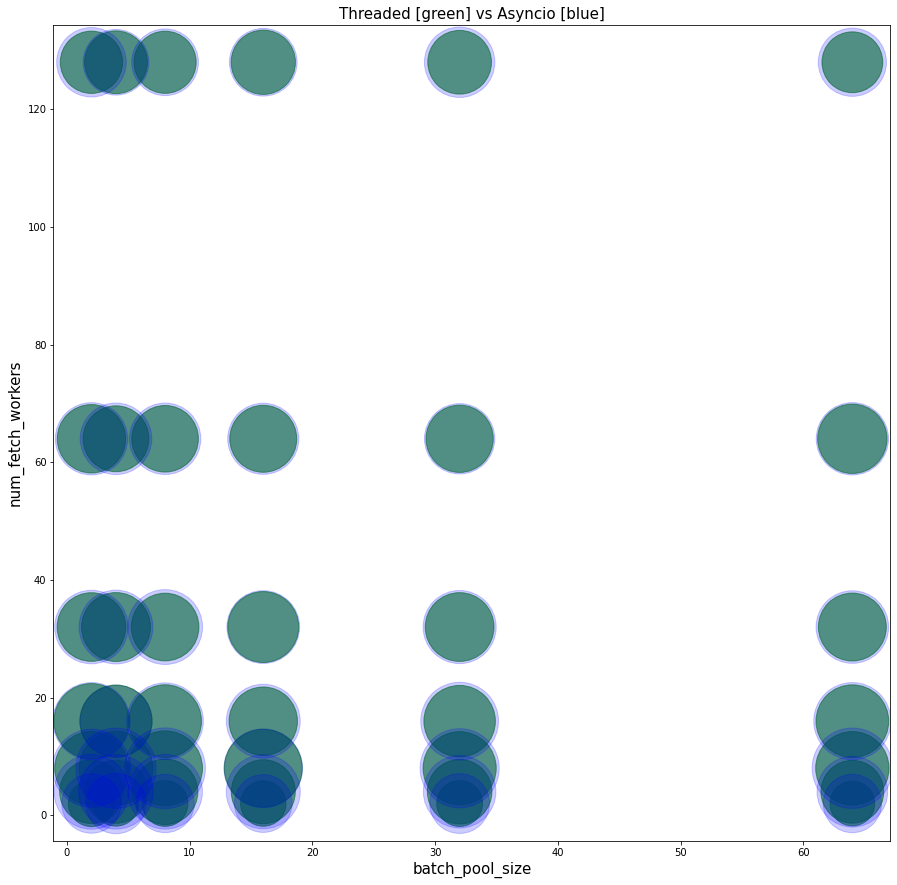

In [15]:
plt.rcParams["figure.figsize"] = (15,15)
ax = plt.gca()
ax.scatter(rate_matrix_asyncio.x, rate_matrix_asyncio.y, s=rate_matrix_asyncio.rate**1.3,
             alpha=0.6, 
             c="green",
             marker='o')
ax.scatter(rate_matrix_threaded.x, rate_matrix_threaded.y, s=rate_matrix_threaded.rate**1.3,
             alpha=0.2, 
             c="blue",
             marker='o')
plt.xlabel("batch_pool_size", size=15)
plt.ylabel("num_fetch_workers", size=15)
plt.title("Threaded [green] vs Asyncio [blue]", size=15)

In [16]:
both = pd.concat([rate_matrix_asyncio, rate_matrix_threaded["rate"]], ignore_index = True, axis = 1)
both['diff'] = both.apply(lambda row: float(row[3] - row[2]) , axis = 1)
both.columns = ['x', 'y', 'asyncio', 'threaded', 'diff']
both["diff"] = both["diff"].clip(lower=0)
# both

Bubble plot shows 3 dimensions, however it's hard to visualize the difference between two approaches, therefore the following bar-plots show each dimension batch_pool_size and num_fetch_workers separately, while the y-axis shows the rate in Mbit/s.

Since it doesn't have any effect for asyncio, those should be roughly the same. However, we can observe that for threaded implementation we have the similar result (Does this mean we don't have a problem with batch-collection order? (e.g. batch 3 is not collected before batch 2))

Text(0.5, 1.0, 'Threaded [red] vs asyncio [blue]')

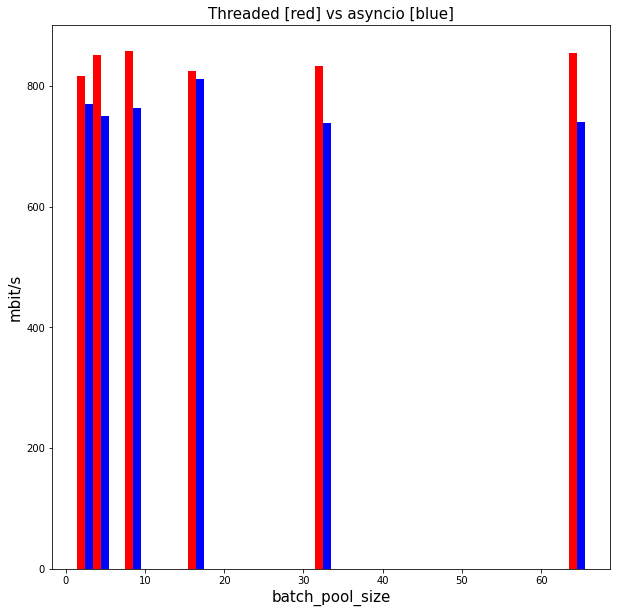

In [17]:
plt.rcParams["figure.figsize"] = (10,10)
ax = plt.subplot(111)
ax.bar(x=list(both.x), height=list(both.threaded), width=1, color="red")
ax.bar(x=list(both.x+1), height=list(both.asyncio), width=1, color="blue")
plt.xlabel("batch_pool_size", size=15)
plt.ylabel("mbit/s", size=15)
plt.title("Threaded [red] vs asyncio [blue]", size=15)

Text(0.5, 1.0, 'Threaded [red] vs asyncio [blue]')

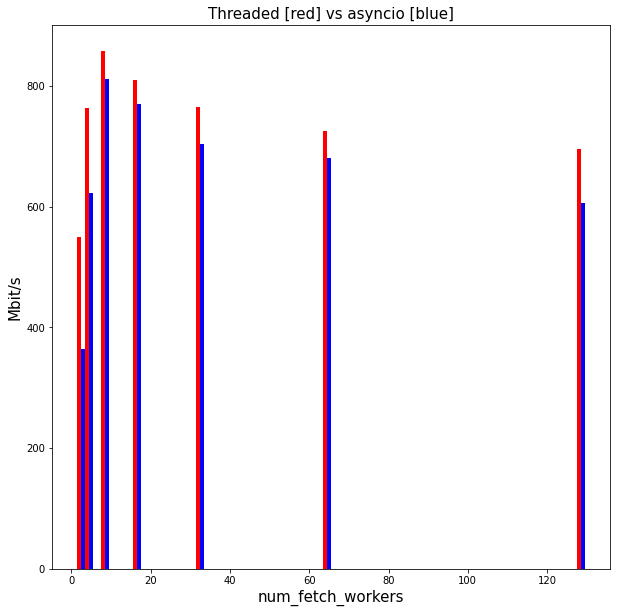

In [18]:
plt.rcParams["figure.figsize"] = (10,10)
ax = plt.subplot(111)
ax.bar(x=list(both.y), height=list(both.threaded), width=1, color="red")
ax.bar(x=list(both.y+1), height=list(both.asyncio), width=1, color="blue")
plt.xlabel("num_fetch_workers", size=15)
plt.ylabel("Mbit/s", size=15)
plt.title("Threaded [red] vs asyncio [blue]", size=15)

In [19]:
both.sort_values(by=['threaded'], ascending=False)
# x = batch_pool_size, y = num_fetch_workers

,x,y,asyncio,threaded,diff
16,8.0,8.0,763.9,858.3,94.4
37,64.0,8.0,740.5,854.4,113.9
9,4.0,8.0,750.2,851.7,101.5
30,32.0,8.0,738.2,832.8,94.6
23,16.0,8.0,812.0,825.0,13.0
2,2.0,8.0,743.8,816.3,72.5
31,32.0,16.0,711.9,810.7,98.8
3,2.0,16.0,769.7,803.5,33.8
38,64.0,16.0,730.7,802.6,71.9
17,8.0,16.0,732.2,792.5,60.3


### Threaded best run 

total_elapsed=0:00:08.921356
total_bytes=801.6 MB
overall rate {'89.9 MB'}/s
overall rate {'718.8 MB'}it/s


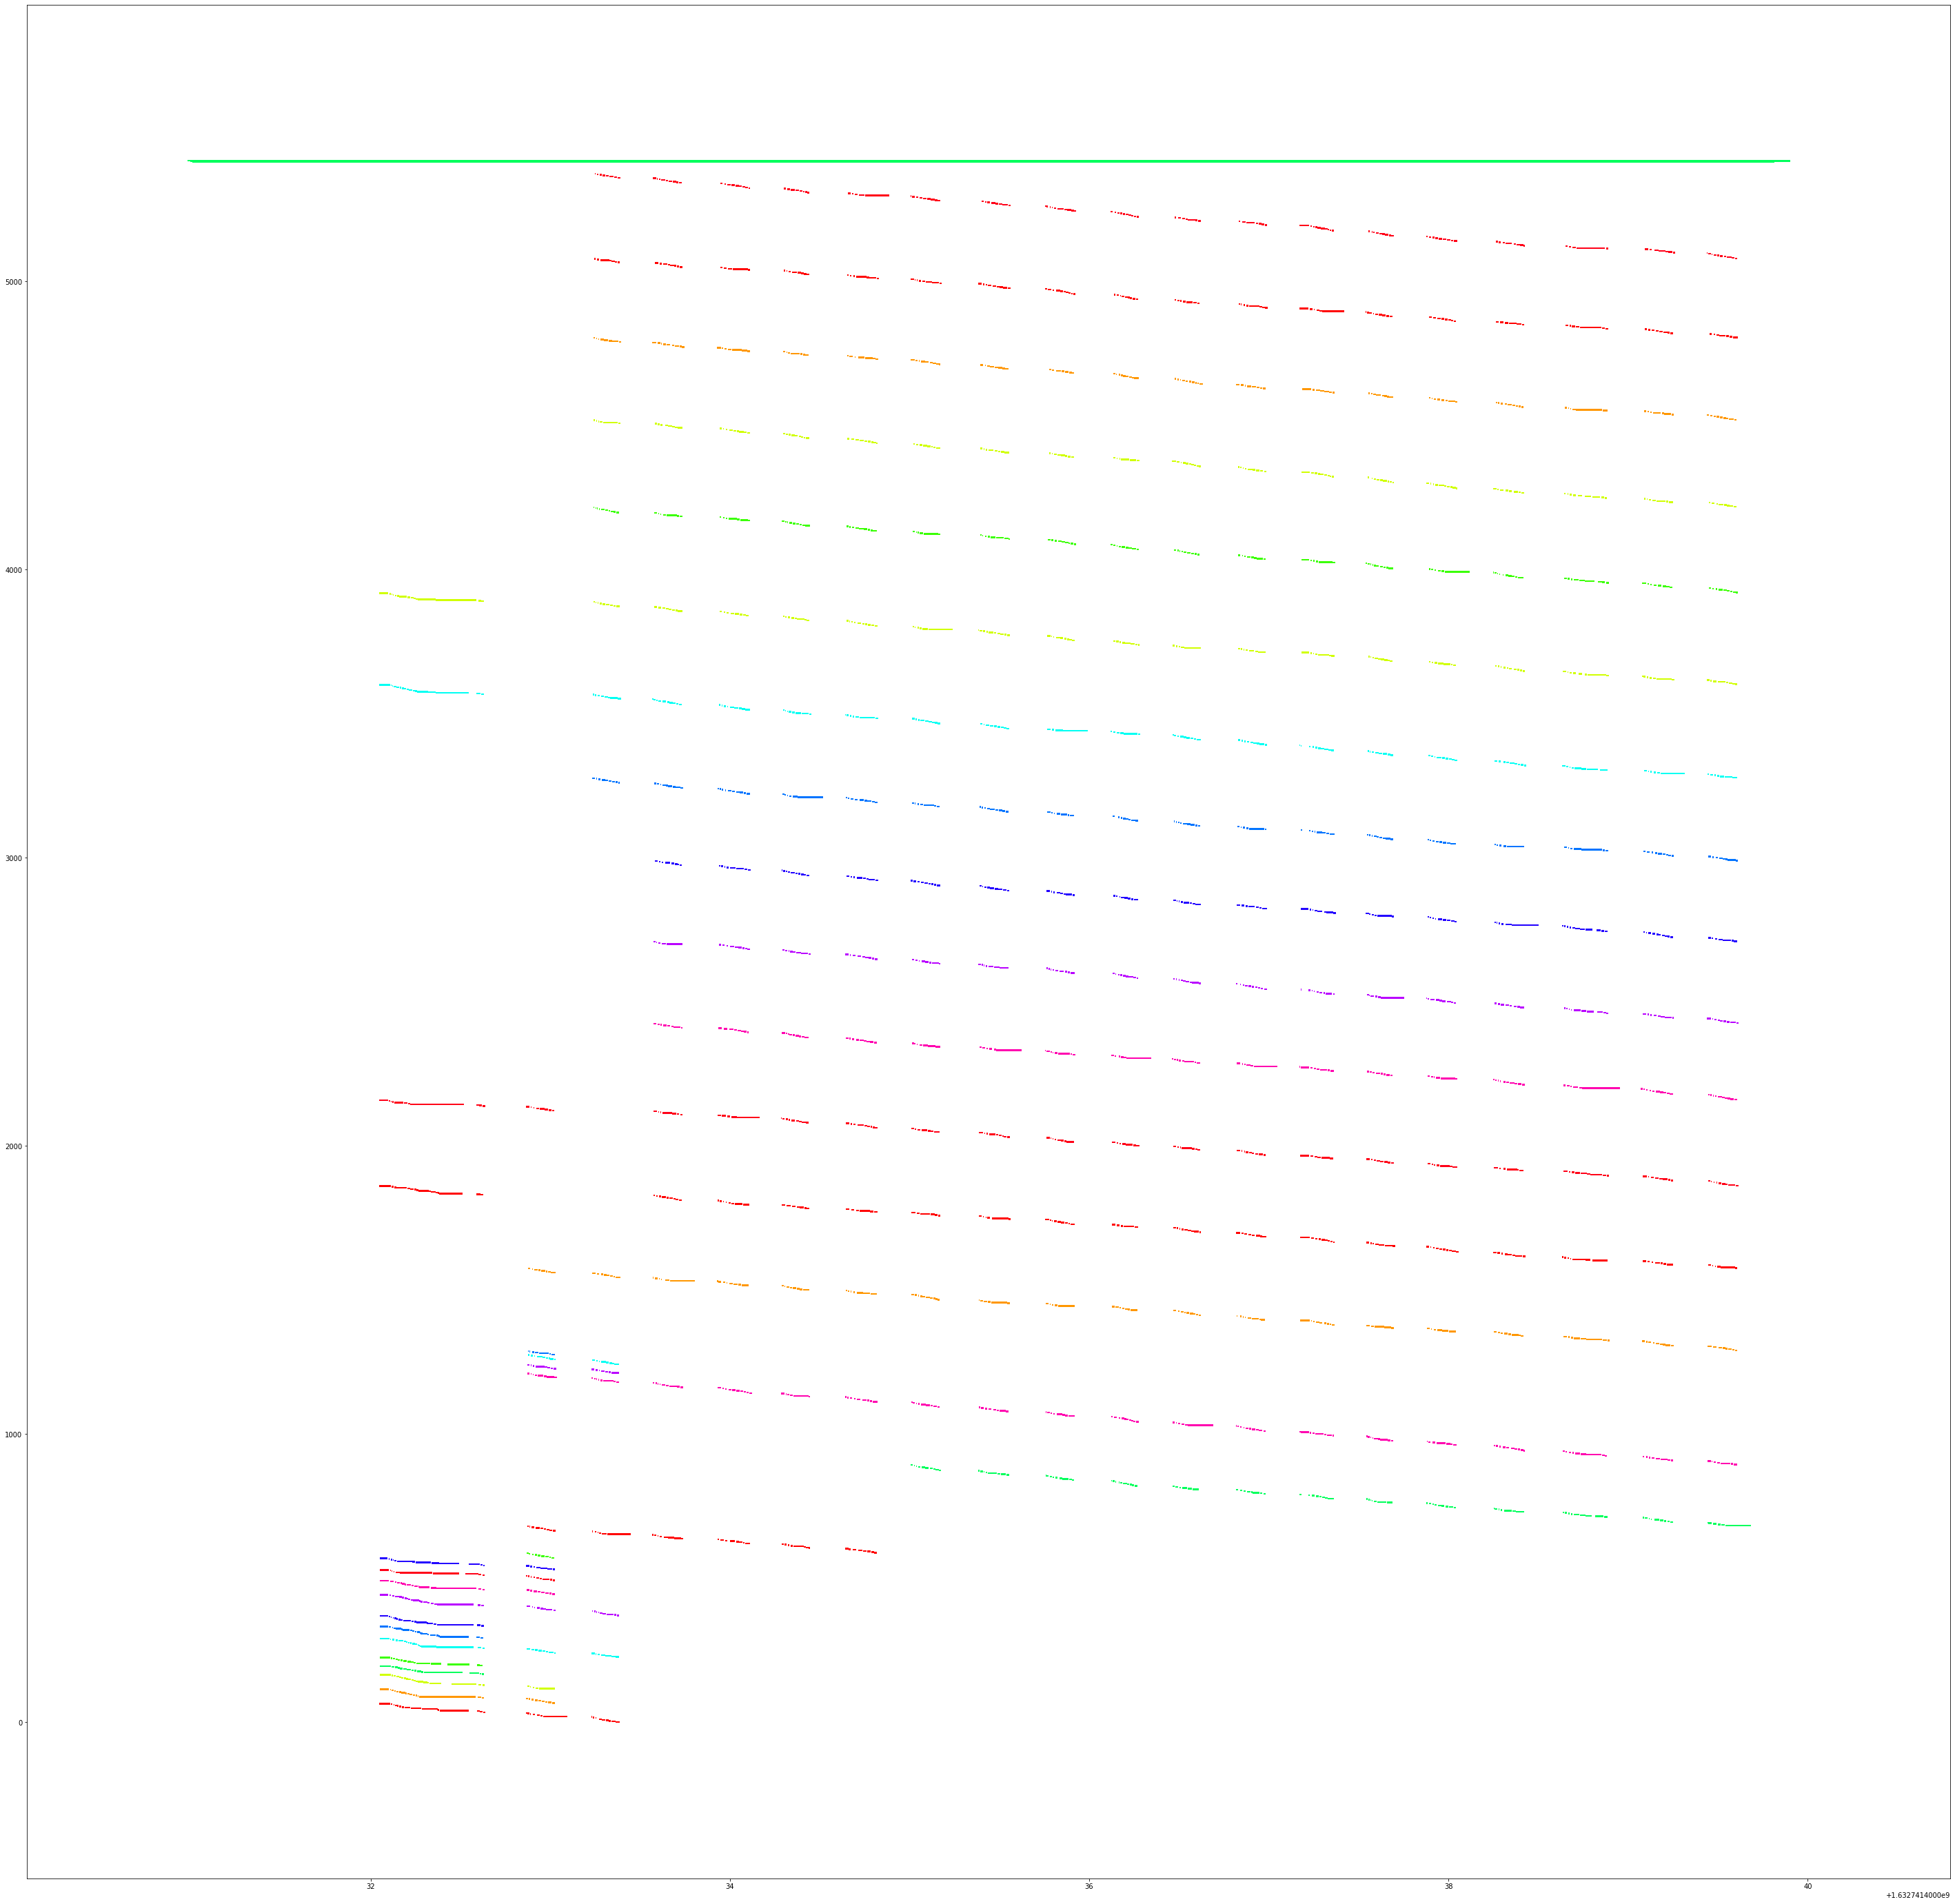

In [20]:
# for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
#     for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
run = df_dataloader_zeroworkers_th[(df_dataloader_zeroworkers_th["num_fetch_workers"]==16) & (df_dataloader_zeroworkers_th["batch_pool"]==4)]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], summary_only=False)

### Threaded worst run 

total_elapsed=0:00:12.328030
total_bytes=801.6 MB
overall rate {'65.0 MB'}/s
overall rate {'520.2 MB'}it/s


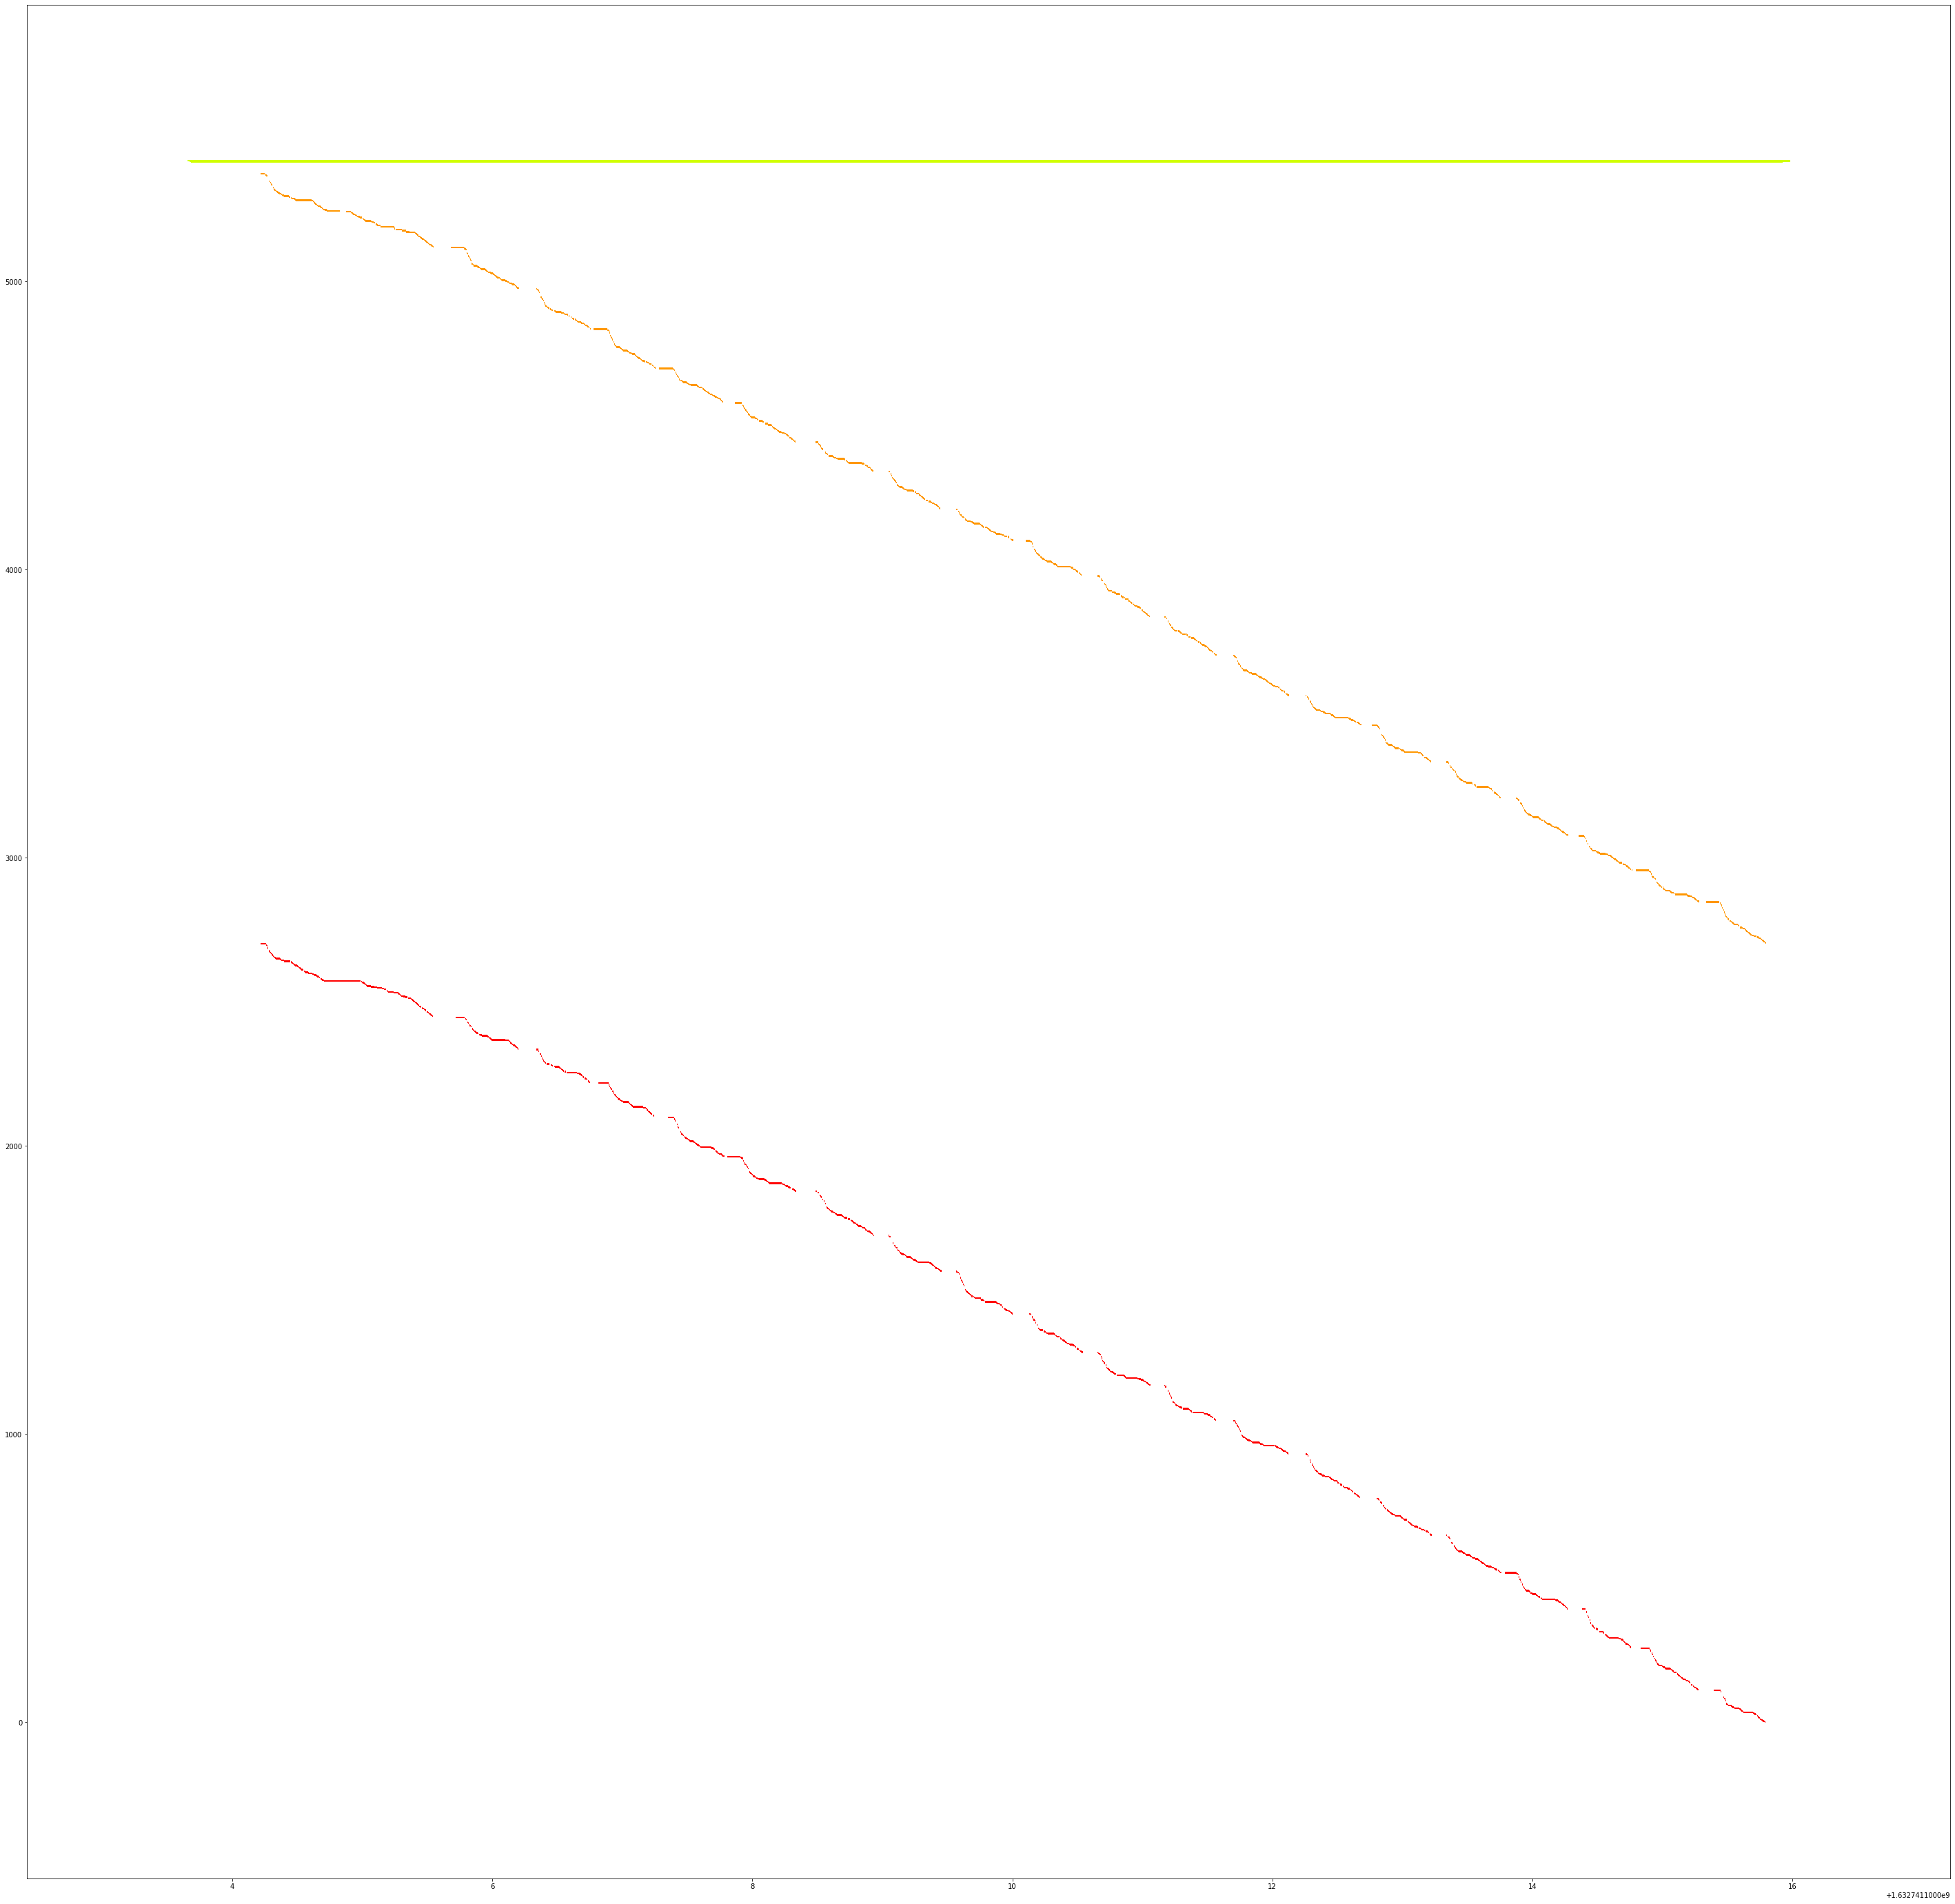

In [21]:
run = df_dataloader_zeroworkers_th[(df_dataloader_zeroworkers_th["num_fetch_workers"]==2) & (df_dataloader_zeroworkers_th["batch_pool"]==8)]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers_th[df_dataloader_zeroworkers_th["run"]==run], summary_only=False)

### Asyncio best run 

total_elapsed=0:00:03.855619
total_bytes=339.1 MB
overall rate {'88.0 MB'}/s
overall rate {'703.7 MB'}it/s


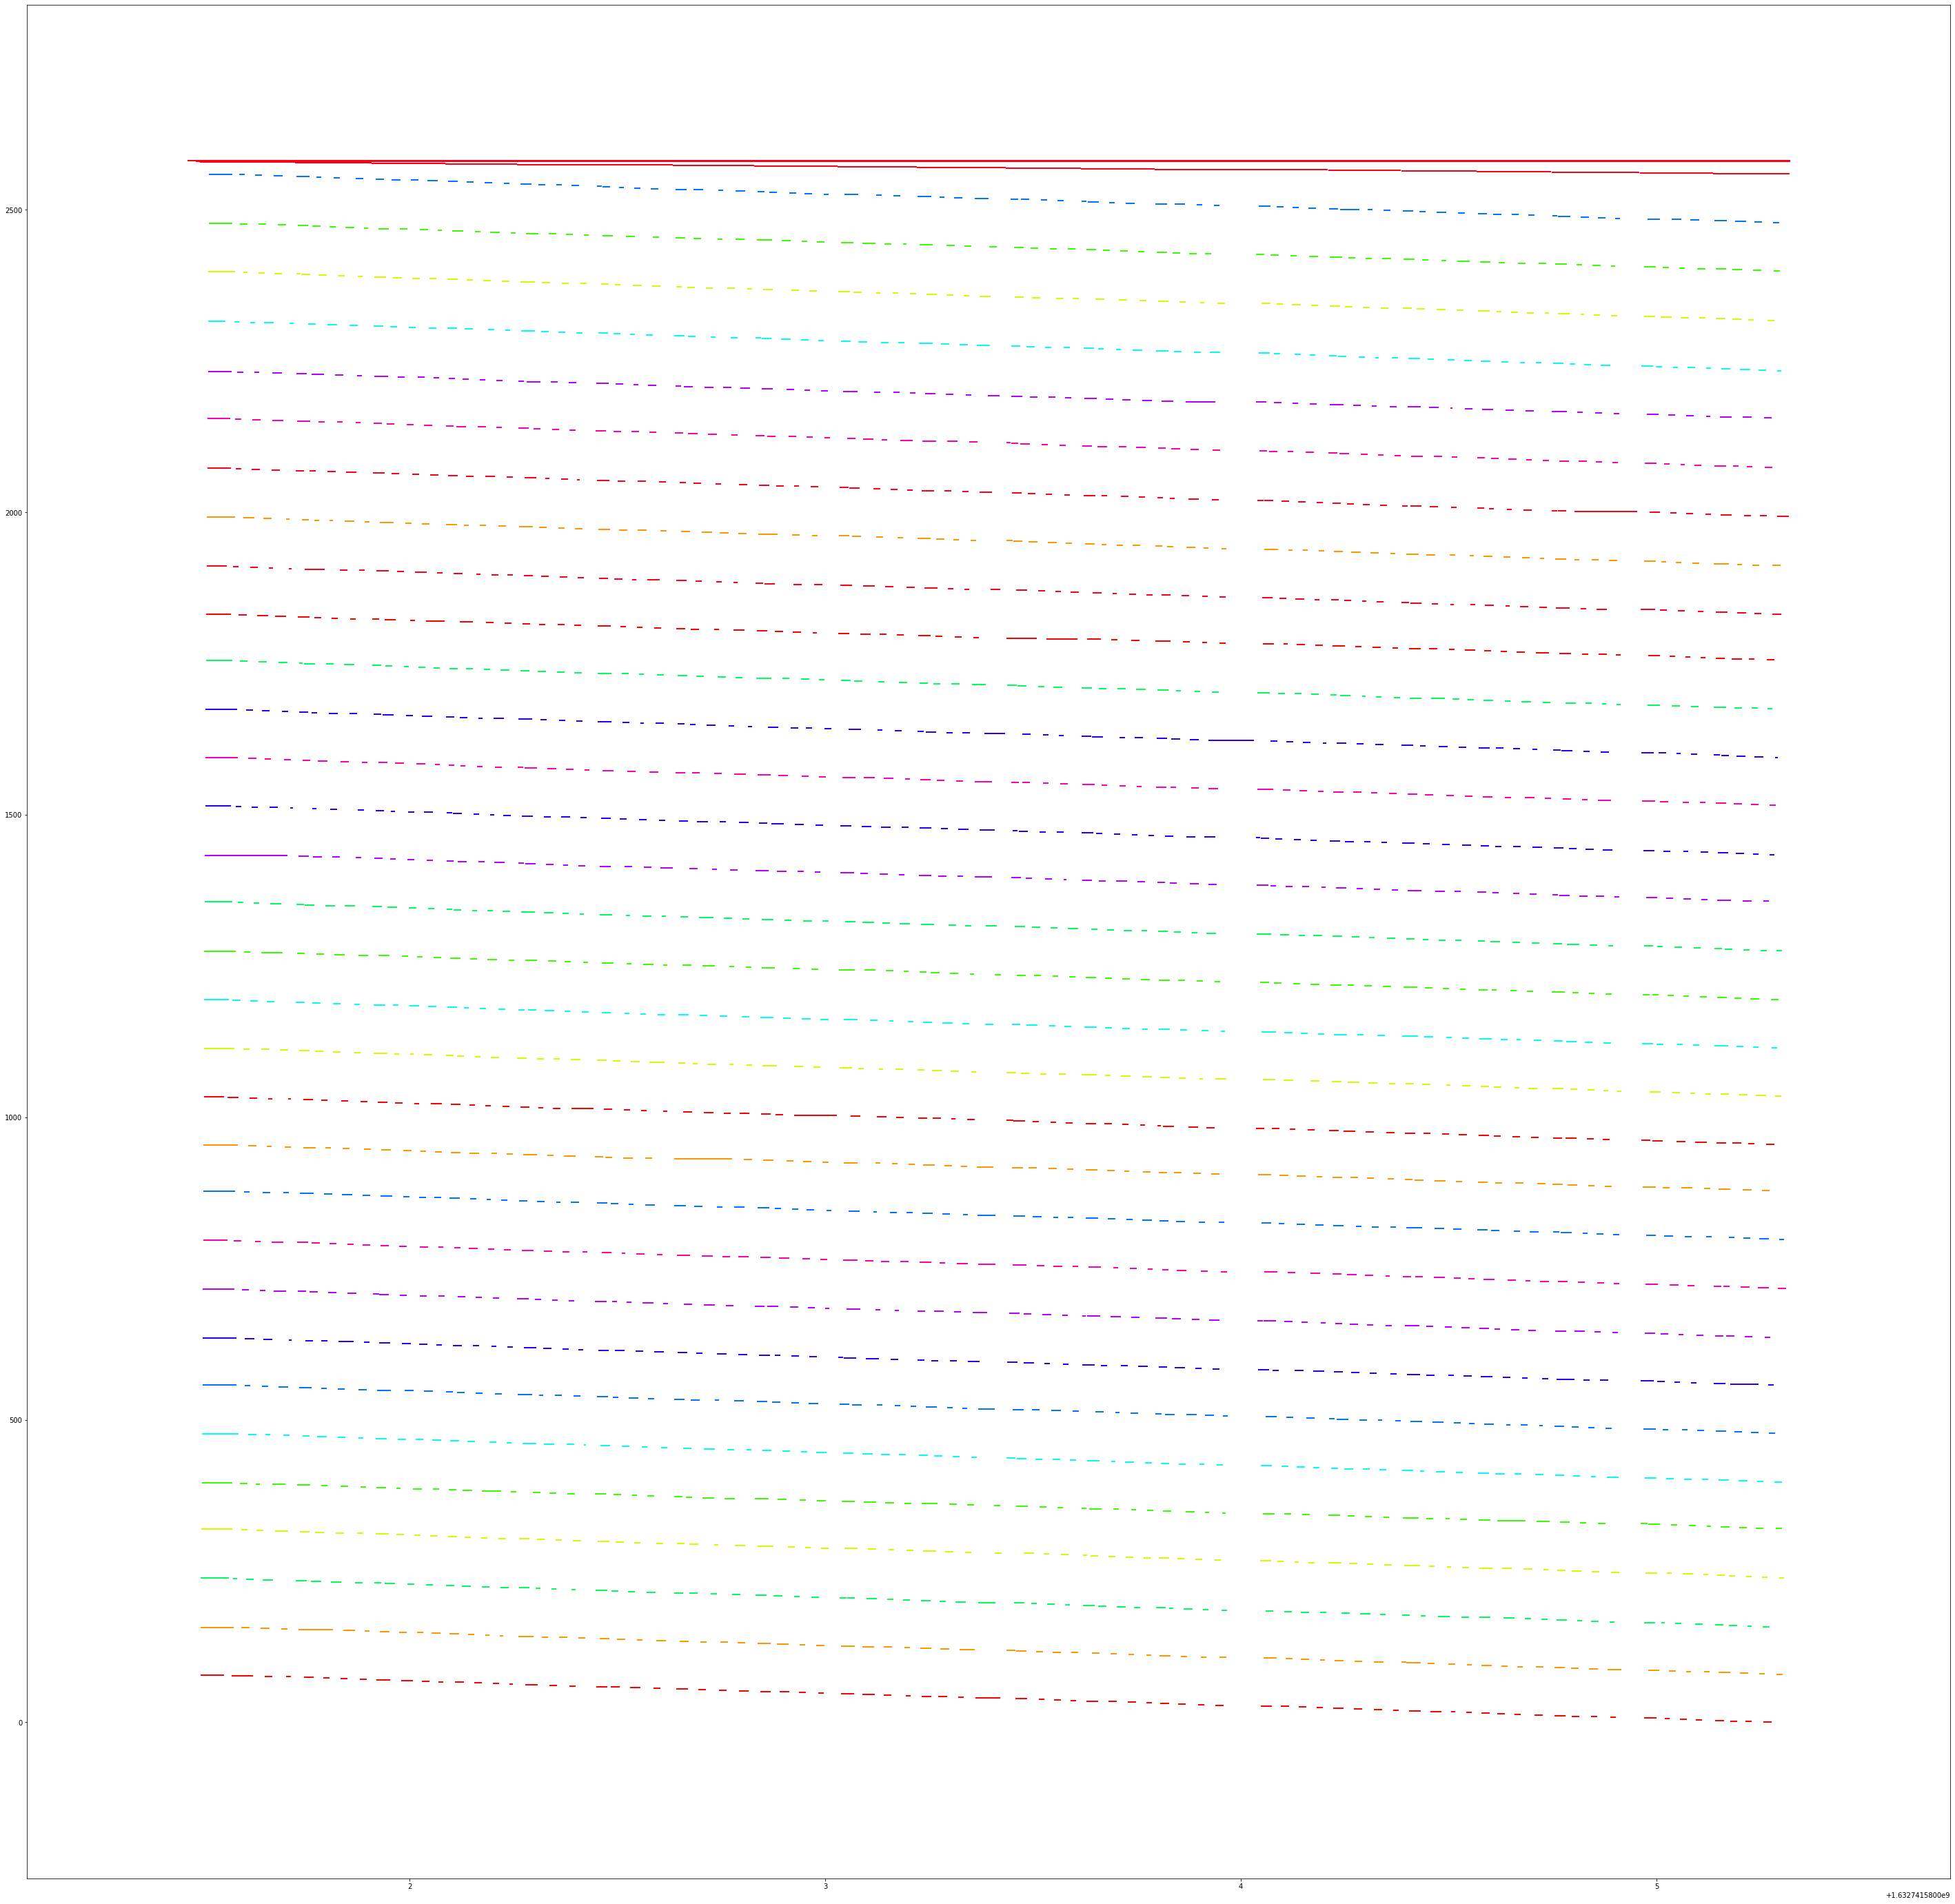

In [22]:
# for i, batch_pool_size in enumerate([2, 4, 8, 16, 32, 64]):
#     for j, num_fetch_workers in enumerate([2, 4, 8, 16, 32, 64, 128]):
run = df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==32) & (df_dataloader_zeroworkers_aio["batch_pool"]==16)]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], summary_only=False)

### Asyncio worst run

total_elapsed=0:00:07.720360
total_bytes=351.1 MB
overall rate {'45.5 MB'}/s
overall rate {'363.8 MB'}it/s


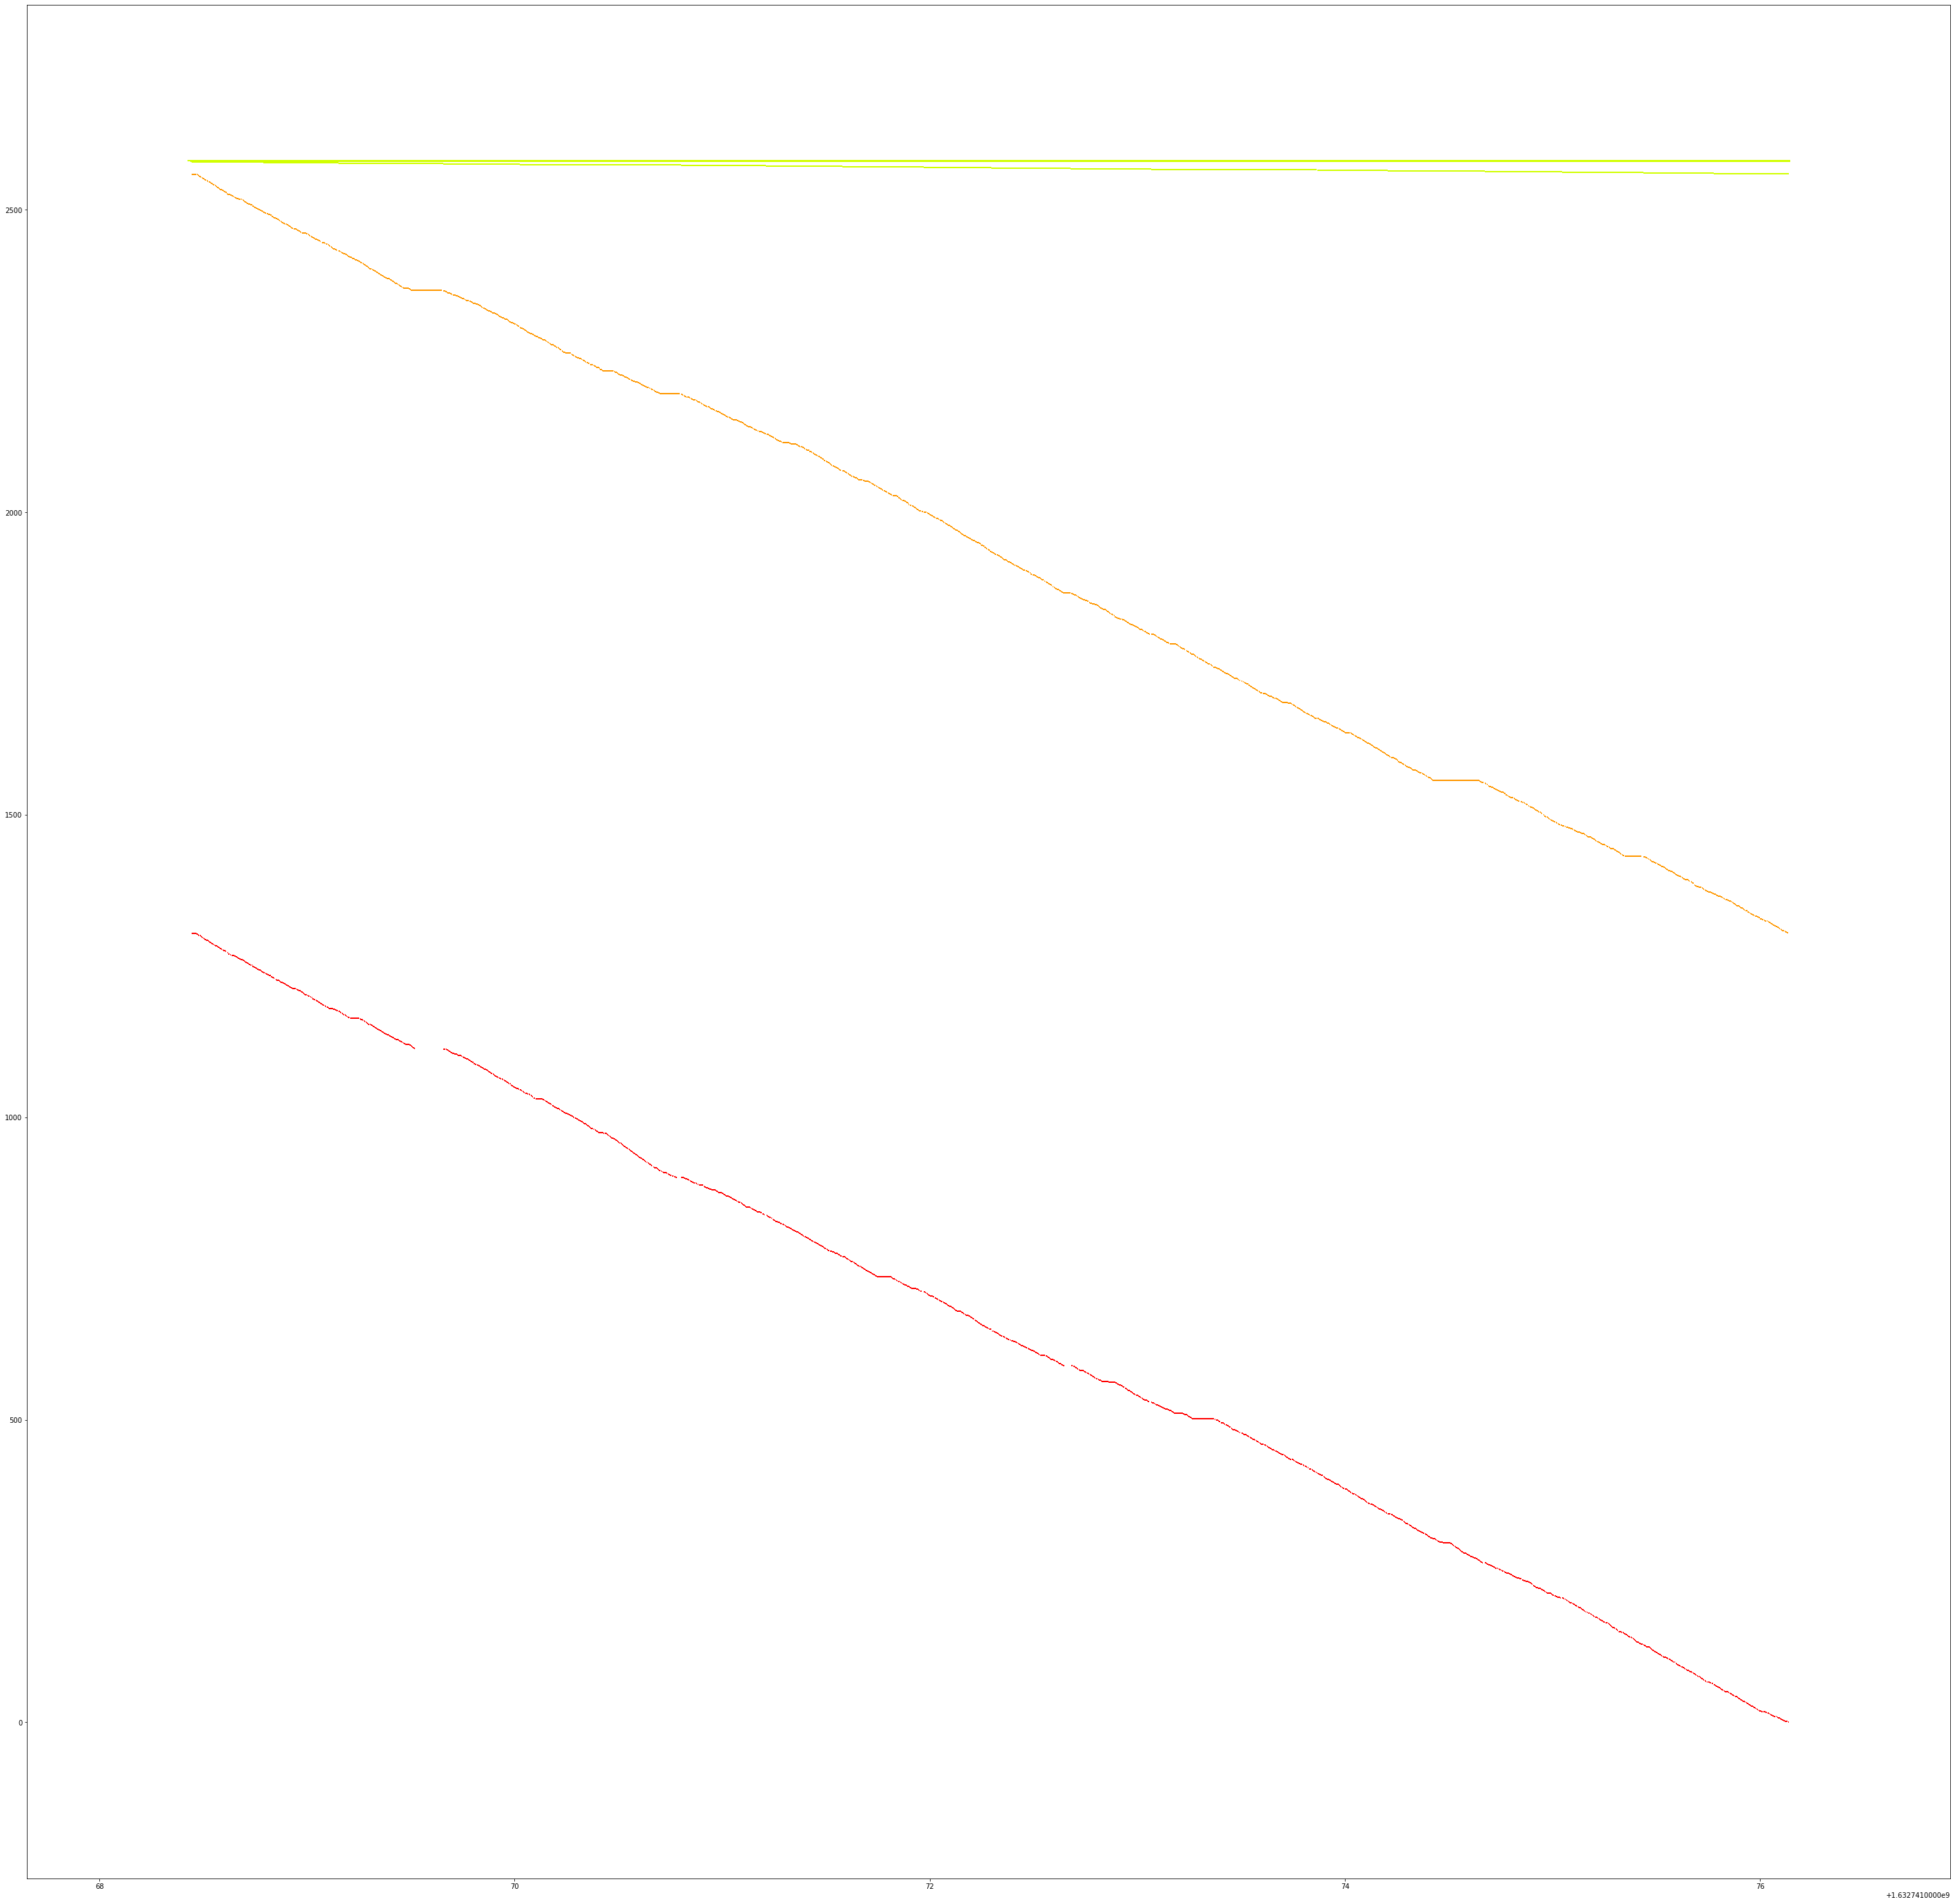

In [23]:
run = df_dataloader_zeroworkers_aio[(df_dataloader_zeroworkers_aio["num_fetch_workers"]==2) & (df_dataloader_zeroworkers_aio["batch_pool"]==2)]["run"].iloc[0]
plot_events_timeline(df_dataloader_zeroworkers_aio[df_dataloader_zeroworkers_aio["run"]==run], summary_only=False)